In [58]:
import pandas as pd

In [59]:
## Check working directory

In [60]:
pwd

'C:\\Users\\Kamal\\Desktop'

In [61]:
# change working directory

In [62]:
cd\Users\Kamal\Desktop

C:\Users\Kamal\Desktop


In [63]:
#import Autos csv file
df=pd.read_csv('Autos.csv')

In [64]:
# check data
df.head()

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [65]:
# check attributes data types
df.dtypes

symboling              int64
normalized-losses    float64
make-id                int64
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [66]:
# import 'makes.csv' file
df1=pd.read_csv('D:\Backup\Skanem\Personal\Data Science School\Microsoft Course\Data Science Essentials\Lab\Mod6\makes.csv')

In [67]:
df1.head()


,make-id,make
0,1,alfa-romero
1,2,audi
2,3,bmw
3,4,chevrolet
4,5,dodge


In [68]:
# Merge to get make in the main file based on key - make-id. We did an outer merge.
autos=pd.merge(df,df1, how='outer', on=['make-id'])

In [69]:
autos.head()

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make
0,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,alfa-romero
1,3,NaN,1,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,alfa-romero
2,1,NaN,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,alfa-romero
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,audi
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,audi


In [70]:
import numpy as np

In [71]:
# select relevant columns for modelling
autos_short=autos.iloc[:,[3,4,5,6,9,10,11,12,13,15,16,17,19,21,23,24,25,26]]

In [72]:
#to count NaN (nulls) in each column
autos_short.isnull().sum()

fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
num-of-cylinders    0
engine-size         0
fuel-system         0
stroke              4
horsepower          2
city-mpg            0
highway-mpg         0
price               4
make                0
dtype: int64

In [73]:
# Drop rows with NaN values
autos_short=autos_short.dropna(how='any', axis=0)

In [74]:
# Confirm result
autos_short.isnull().sum()

fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
num-of-cylinders    0
engine-size         0
fuel-system         0
stroke              0
horsepower          0
city-mpg            0
highway-mpg         0
price               0
make                0
dtype: int64

In [75]:
# To check number of rows and columns (in same order)
print(autos_short.shape)
print(autos_short.duplicated().sum())

(204, 18)
11


In [76]:
# To see duplicated rows
autos_short.loc[autos_short.duplicated(),:]

,fuel-type,aspiration,num-of-doors,body-style,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,stroke,horsepower,city-mpg,highway-mpg,price,make
205,gas,std,four,sedan,104.3,188.8,67.2,56.2,2912,four,141,mpfi,3.15,114.0,23,28,12940.0,volvo
206,gas,std,four,wagon,104.3,188.8,67.2,57.5,3034,four,141,mpfi,3.15,114.0,23,28,13415.0,volvo
207,gas,std,four,sedan,104.3,188.8,67.2,56.2,2935,four,141,mpfi,3.15,114.0,24,28,15985.0,volvo
208,gas,std,four,wagon,104.3,188.8,67.2,57.5,3042,four,141,mpfi,3.15,114.0,24,28,16515.0,volvo
209,gas,turbo,four,sedan,104.3,188.8,67.2,56.2,3045,four,130,mpfi,3.15,162.0,17,22,18420.0,volvo
210,gas,turbo,four,wagon,104.3,188.8,67.2,57.5,3157,four,130,mpfi,3.15,162.0,17,22,18950.0,volvo
211,gas,std,four,sedan,109.1,188.8,68.9,55.5,2952,four,141,mpfi,3.15,114.0,23,28,16845.0,volvo
212,gas,turbo,four,sedan,109.1,188.8,68.8,55.5,3049,four,141,mpfi,3.15,160.0,19,25,19045.0,volvo
213,gas,std,four,sedan,109.1,188.8,68.9,55.5,3012,six,173,mpfi,2.87,134.0,18,23,21485.0,volvo
214,diesel,turbo,four,sedan,109.1,188.8,68.9,55.5,3217,six,145,idi,3.40,106.0,26,27,22470.0,volvo


In [77]:
# To drop duplicates keeping first instances (it selects first by default as well)
autos_short.drop_duplicates(keep='first').shape

(193, 18)

In [78]:
# To cehck data by make (just for demo; not related to the model)
autos_short.loc[:, ['make','body-style', 'curb-weight', 'price']].groupby(['make', 'body-style']).aggregate(np.mean).sort_values('price') 

curb-weight         price
make            body-style                            
chevrolet       hatchback    1681.000000   5723.000000
                sedan        1909.000000   6575.000000
subaru          hatchback    2136.666667   6591.333333
isuzu           sedan        2337.000000   6785.000000
honda           hatchback    1970.000000   7054.428571
plymouth        sedan        2090.000000   7150.500000
dodge           sedan        1989.000000   7150.500000
honda           wagon        2024.000000   7295.000000
dodge           hatchback    2131.600000   7819.800000
mazda           hatchback    2148.333333   8128.333333
plymouth        hatchback    2207.750000   8130.500000
nissan          hardtop      2008.000000   8249.000000
mitsubishi      sedan        2394.000000   8434.000000
nissan          sedan        2237.888889   8604.555556
dodge           wagon        2535.000000   8921.000000
plymouth        wagon        2535.000000   8921.000000
subaru          sedan        2314.000000   9070.600000
                wagon        2453.750000   9342.000000
toyota          sedan        2337.500000   9542.200000
mitsubishi      hatchback    2376.555556   9597.888889
toyota          hatchback    2369.928571   9616.000000
volkswagen      sedan        2342.222222   9673.888889
toyota          hardtop      2585.000000   9762.333333
                wagon        2707.750000   9836.000000
nissan          wagon        2452.333333   9915.666667
honda           sedan        2288.800000   9945.000000
volkswagen      hatchback    2221.000000   9980.000000
isuzu           hatchback    2734.000000  11048.000000
mazda           sedan        2347.500000  11575.666667
volkswagen      convertible  2254.000000  11595.000000
                wagon        2563.000000  12290.000000
nissan          hatchback    2740.200000  14409.000000
alfa-romero     convertible  2548.000000  14997.500000
saab            hatchback    2724.333333  15013.333333
peugot          wagon        3357.500000  15017.500000
saab            sedan        2766.666667  15433.333333
peugot          sedan        3143.000000  15758.571429
volvo           wagon        3077.666667  16293.333333
alfa-romero     hatchback    2823.000000  16500.000000
mercury         hatchback    2910.000000  16503.000000
audi            sedan        2719.600000  17647.000000
toyota          convertible  2975.000000  17669.000000
volvo           sedan        3023.000000  18726.875000
audi            wagon        2954.000000  18920.000000
porsche         hatchback    2778.000000  22018.000000
bmw             sedan        2929.375000  26118.750000
mercedes-benz   wagon        3750.000000  28248.000000
                sedan        3731.250000  33074.000000
porsche         hardtop      2756.000000  33278.000000
jaguar          sedan        4027.333333  34600.000000
mercedes-benz   convertible  3685.000000  35056.000000
                hardtop      3605.000000  36788.000000
porsche         convertible  2800.000000  37028.000000

In [79]:
import matplotlib.pyplot as plt

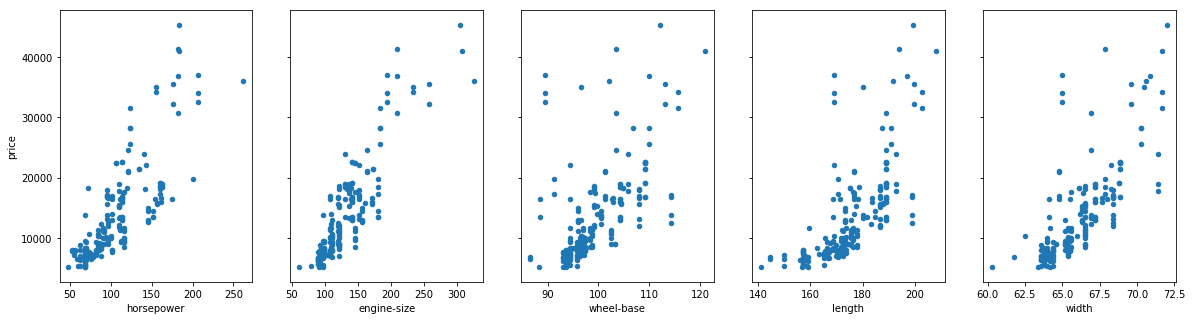

In [80]:
# to draw linechart between various attributes and price, definfing axis and title
fig, axs=plt.subplots(1,5, sharey=True,figsize=(20,5))
autos_short.plot(kind='scatter', x='horsepower', y='price', ax=axs[0])
autos_short.plot(kind='scatter', x='engine-size', y='price', ax=axs[1])
autos_short.plot(kind='scatter', x='wheel-base', y='price', ax=axs[2])
autos_short.plot(kind='scatter', x='length', y='price', ax=axs[3])
autos_short.plot(kind='scatter', x='width', y='price', ax=axs[4])


In [81]:
# As the relations between price and different attributes seem to be non-linear letus take log of price and then see the relation
import math
autos_short['lnprice']=autos_short['price'].apply(lambda x: math.log(x))

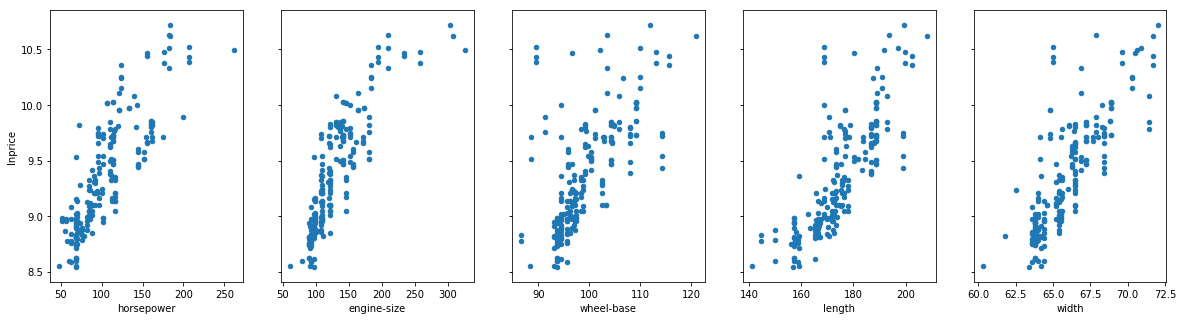

In [82]:
# to draw linechart between various attributes and price, definfing axis and title
fig, axs=plt.subplots(1,5, sharey=True,figsize=(20,5))
autos_short.plot(kind='scatter', x='horsepower', y='lnprice', ax=axs[0])
autos_short.plot(kind='scatter', x='engine-size', y='lnprice', ax=axs[1])
autos_short.plot(kind='scatter', x='wheel-base', y='lnprice', ax=axs[2])
autos_short.plot(kind='scatter', x='length', y='lnprice', ax=axs[3])
autos_short.plot(kind='scatter', x='width', y='lnprice', ax=axs[4])


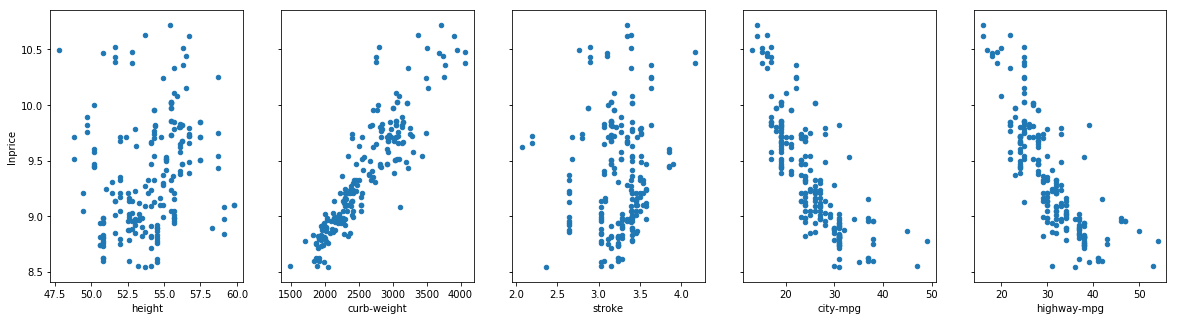

In [83]:
# Relation between different attributes and lnprice is more linear so lets do all analysis on lnprice
fig, axs=plt.subplots(1,5, sharey=True, figsize=(20,5))
autos_short.plot(kind='scatter', x='height', y='lnprice', ax=axs[0])
autos_short.plot(kind='scatter', x='curb-weight', y='lnprice', ax=axs[1])
autos_short.plot(kind='scatter', x='stroke', y='lnprice', ax=axs[2])
autos_short.plot(kind='scatter', x='city-mpg', y='lnprice',ax=axs[3])
autos_short.plot(kind='scatter', x='highway-mpg', y='lnprice', ax=axs[4])


In [84]:
# clearly, there is no relationship between height and price and also stroke, wheel-base & price so lets drop it from the model
# lets also drop lrice as lnprice is a better indicator
autos_short.drop(['height','stroke','wheel-base'], axis=1, inplace=True)


In [29]:
import seaborn as sb

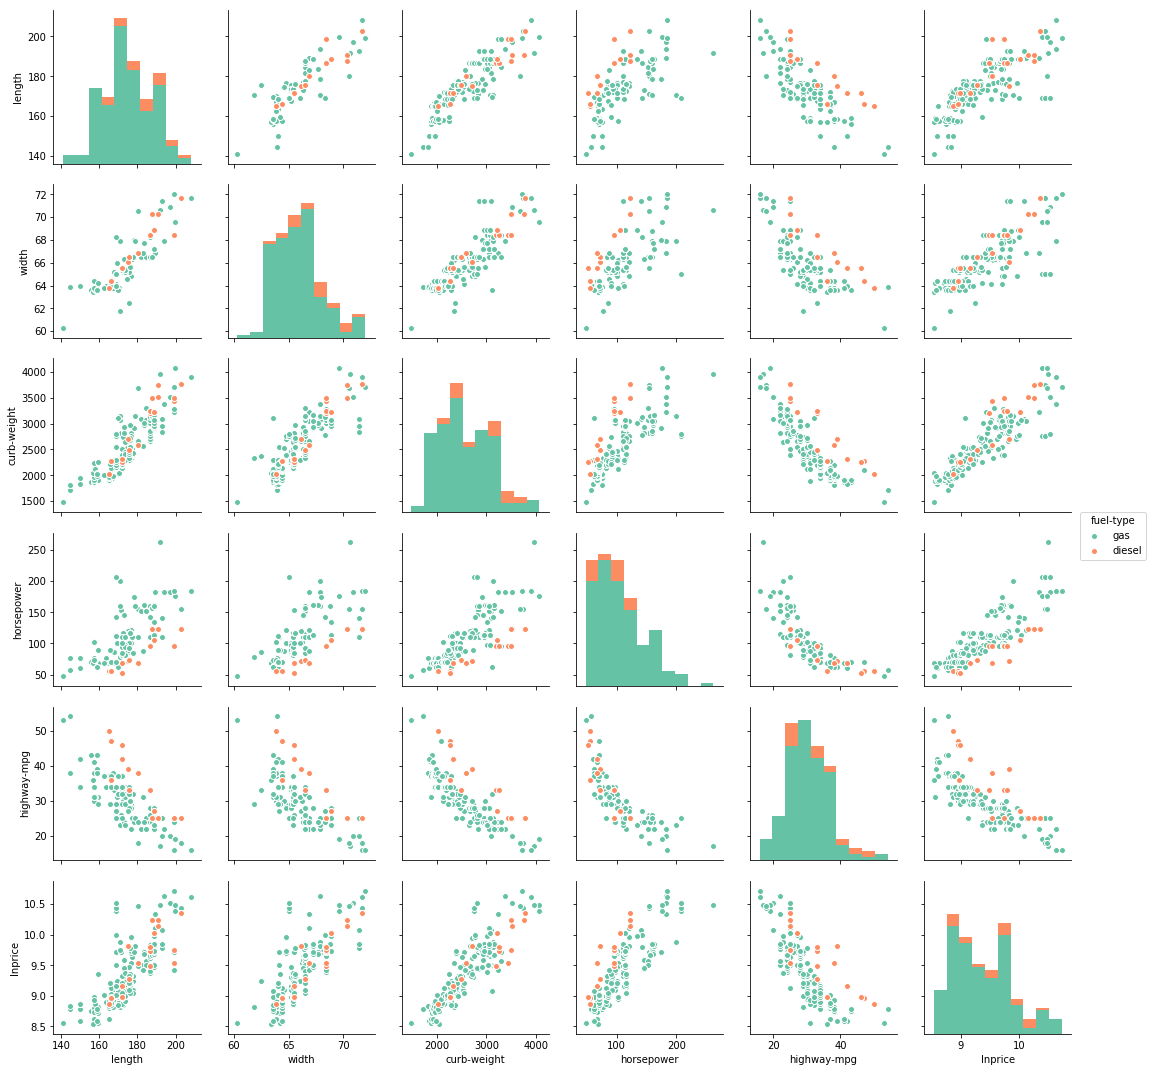

In [30]:
# Advance charts - Grid plot
num_cols=['length','width','curb-weight','horsepower','highway-mpg','fuel-type','lnprice']
sb.pairplot(autos_short[num_cols], hue='fuel-type', palette='Set2')

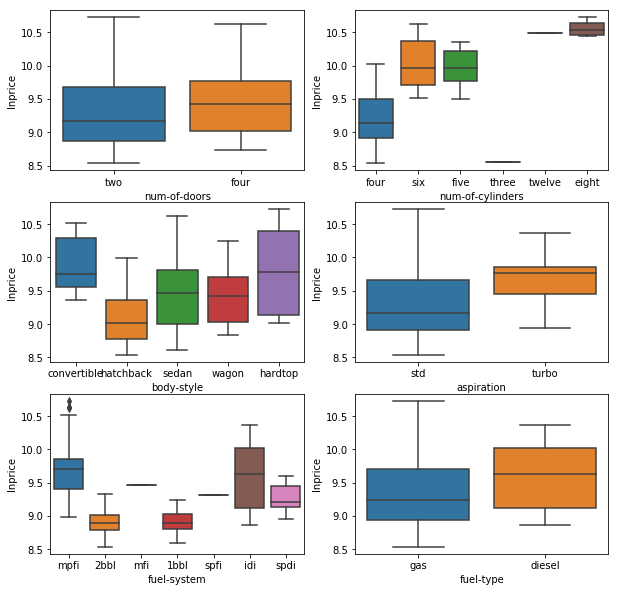

In [88]:
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(10,10))
sb.boxplot(x='num-of-doors',y='lnprice', data=autos_short, ax=axs[0,0])
sb.boxplot(x='num-of-cylinders',y='lnprice', data=autos_short, ax=axs[0,1])
sb.boxplot(x='body-style',y='lnprice', data=autos_short, ax=axs[1,0])
sb.boxplot(x='aspiration',y='lnprice', data=autos_short, ax=axs[1,1])
sb.boxplot(x='fuel-system',y='lnprice', data=autos_short, ax=axs[2,0])
sb.boxplot(x='fuel-type',y='lnprice', data=autos_short, ax=axs[2,1])

In [32]:
# Above charts show that all attributes have relation with price so we cannot drop any. 
# We can group some categories of num-of-cylinders and fuel-system to reduce number of categories

In [33]:
# For regression model, its importantTo scale and normalize data in features so that mean=0 and sd=1. This ensures that features 
## with different mean value do not impact the model differently
from sklearn import preprocessing as pr
## Define numeric column names
num_cols=['length','width','curb-weight','engine-size','horsepower', 'highway-mpg', 'city-mpg']
# Scale the numeric columns. We have to convert the df to matrux as this function is applicable in numpy
arry=autos_short[num_cols].as_matrix()
autos_short[num_cols]=pr.scale(arry, axis=0)

In [34]:
autos_short.head()


,fuel-type,aspiration,num-of-doors,body-style,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,make,lnprice
0,gas,std,two,convertible,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,alfa-romero,9.510075
1,gas,std,two,convertible,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,alfa-romero,9.711116
2,gas,std,two,hatchback,-0.311561,-0.236732,0.451245,six,0.56996,mpfi,1.309435,-0.967522,-0.671446,alfa-romero,9.711116
3,gas,std,four,sedan,0.119074,0.091157,-0.478786,four,-0.49042,mpfi,-0.074631,-0.174853,-0.077194,audi,9.543235
4,gas,std,four,sedan,0.119074,0.184839,0.453158,five,0.17540,mpfi,0.271385,-1.126056,-1.265698,audi,9.767095


In [36]:
# Lets reduce number of categories as explained above
def tran_numcyl(x):
    if x==('three'):
        return 'four or less'
    if x==('four'):
        return 'four or less'
    if x==('five'):
        return 'five-six'
    if x==('six'):
        return 'five-six'
    if x==('eight'):
        return 'eight or more'
    if x==('twelve'):
        return 'eight or more'
def tran_fuelsys(x):
    if x=='1bbl':
        return 'bbl'
    if x=='2bbl':
        return 'bbl'
    if x=='spdi':
        return 'spdi-mfi-spfi'
    if x=='mfi':
        return 'spdi-mfi-spfi'
    if x=='spfi':
        return 'spdi-mfi-spfi'
    if x=='mpfi':
        return 'mpfi-idi'
    if x=='idi':
        return 'mpfi-idi'
            
    

In [37]:
autos_short['numcyl']=autos_short['num-of-cylinders'].apply(tran_numcyl)
autos_short['fuelsys']=autos_short['fuel-system'].apply(tran_fuelsys)
autos_short.head()

,fuel-type,aspiration,num-of-doors,body-style,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,make,lnprice,numcyl,fuelsys
0,gas,std,two,convertible,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,alfa-romero,9.510075,four or less,mpfi-idi
1,gas,std,two,convertible,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,alfa-romero,9.711116,four or less,mpfi-idi
2,gas,std,two,hatchback,-0.311561,-0.236732,0.451245,six,0.56996,mpfi,1.309435,-0.967522,-0.671446,alfa-romero,9.711116,five-six,mpfi-idi
3,gas,std,four,sedan,0.119074,0.091157,-0.478786,four,-0.49042,mpfi,-0.074631,-0.174853,-0.077194,audi,9.543235,four or less,mpfi-idi
4,gas,std,four,sedan,0.119074,0.184839,0.453158,five,0.17540,mpfi,0.271385,-1.126056,-1.265698,audi,9.767095,five-six,mpfi-idi


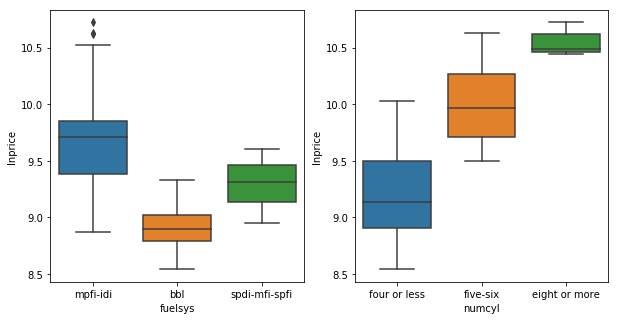

In [38]:
# Lets verify that categories have been reduced correctly
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sb.boxplot(x='fuelsys', y='lnprice', data=autos_short, ax=axs[0])
sb.boxplot(x='numcyl', y='lnprice', data=autos_short, ax=axs[1])

In [39]:
# To convet categorical attributes to numerical, we have to create dummy columns. This is an important step in regression model.
##  This increases number of column significantly but is a mustt for accuracy of regression analysis 
autos_short=pd.get_dummies(autos_short, columns=['num-of-doors', 'numcyl','body-style','aspiration','fuelsys','fuel-type','make'])
autos_short.shape

(204, 48)

In [40]:
autos_short.head()

,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,lnprice,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,9.510075,...,0,0,0,0,0,0,0,0,0,0
1,-0.502955,-0.892510,-0.075007,four,0.02744,mpfi,0.164919,-0.650455,-0.522883,9.711116,...,0,0,0,0,0,0,0,0,0,0
2,-0.311561,-0.236732,0.451245,six,0.56996,mpfi,1.309435,-0.967522,-0.671446,9.711116,...,0,0,0,0,0,0,0,0,0,0
3,0.119074,0.091157,-0.478786,four,-0.49042,mpfi,-0.074631,-0.174853,-0.077194,9.543235,...,0,0,0,0,0,0,0,0,0,0
4,0.119074,0.184839,0.453158,five,0.17540,mpfi,0.271385,-1.126056,-1.265698,9.767095,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [42]:
# Lets change location of lnprice column by creating copy. This will help in column selection.
autos_short['lnprice2']=autos_short['lnprice']
autos_short.shape

(204, 49)

In [43]:
# Lets select the attributes for model and check
x=autos_short.iloc[:,0:48]
x

,length,width,curb-weight,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,lnprice,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,-0.502955,-0.892510,-0.075007,four,0.027440,mpfi,0.164919,-0.650455,-0.522883,9.510075,...,0,0,0,0,0,0,0,0,0,0
1,-0.502955,-0.892510,-0.075007,four,0.027440,mpfi,0.164919,-0.650455,-0.522883,9.711116,...,0,0,0,0,0,0,0,0,0,0
2,-0.311561,-0.236732,0.451245,six,0.569960,mpfi,1.309435,-0.967522,-0.671446,9.711116,...,0,0,0,0,0,0,0,0,0,0
3,0.119074,0.091157,-0.478786,four,-0.490420,mpfi,-0.074631,-0.174853,-0.077194,9.543235,...,0,0,0,0,0,0,0,0,0,0
4,0.119074,0.184839,0.453158,five,0.175400,mpfi,0.271385,-1.126056,-1.265698,9.767095,...,0,0,0,0,0,0,0,0,0,0
5,0.174897,0.137998,-0.153467,five,0.175400,mpfi,0.138302,-0.967522,-0.820009,9.632335,...,0,0,0,0,0,0,0,0,0,0
6,1.403003,2.526903,0.491431,five,0.175400,mpfi,0.138302,-0.967522,-0.820009,9.781885,...,0,0,0,0,0,0,0,0,0,0
7,1.403003,2.526903,0.701932,five,0.175400,mpfi,0.138302,-0.967522,-0.820009,9.847975,...,0,0,0,0,0,0,0,0,0,0
8,1.403003,2.526903,0.954533,five,0.052100,mpfi,0.936802,-1.284589,-1.562824,10.080587,...,0,0,0,0,0,0,0,0,0,0
10,0.135023,-0.564621,-0.367795,four,-0.515080,mpfi,-0.101248,-0.333387,-0.225757,9.706864,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x.dtypes

length                    float64
width                     float64
curb-weight               float64
num-of-cylinders           object
engine-size               float64
fuel-system                object
horsepower                float64
city-mpg                  float64
highway-mpg               float64
lnprice                   float64
num-of-doors_four           uint8
num-of-doors_two            uint8
numcyl_eight or more        uint8
numcyl_five-six             uint8
numcyl_four or less         uint8
body-style_convertible      uint8
body-style_hardtop          uint8
body-style_hatchback        uint8
body-style_sedan            uint8
body-style_wagon            uint8
aspiration_std              uint8
aspiration_turbo            uint8
fuelsys_bbl                 uint8
fuelsys_mpfi-idi            uint8
fuelsys_spdi-mfi-spfi       uint8
fuel-type_diesel            uint8
fuel-type_gas               uint8
make_alfa-romero            uint8
make_audi                   uint8
make_bmw      

In [45]:
# Lets drop num-of-cylinders, fuel-system as we have created dummy columns for these
x.drop(['num-of-cylinders','fuel-system','lnprice'], axis=1, inplace=True)
x.dtypes


length                    float64
width                     float64
curb-weight               float64
engine-size               float64
horsepower                float64
city-mpg                  float64
highway-mpg               float64
num-of-doors_four           uint8
num-of-doors_two            uint8
numcyl_eight or more        uint8
numcyl_five-six             uint8
numcyl_four or less         uint8
body-style_convertible      uint8
body-style_hardtop          uint8
body-style_hatchback        uint8
body-style_sedan            uint8
body-style_wagon            uint8
aspiration_std              uint8
aspiration_turbo            uint8
fuelsys_bbl                 uint8
fuelsys_mpfi-idi            uint8
fuelsys_spdi-mfi-spfi       uint8
fuel-type_diesel            uint8
fuel-type_gas               uint8
make_alfa-romero            uint8
make_audi                   uint8
make_bmw                    uint8
make_chevrolet              uint8
make_dodge                  uint8
make_honda    

In [46]:
y=autos_short.lnprice2

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=1)

In [48]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(153, 45)
(51, 45)
(153,)
(51,)


In [49]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print (linreg.intercept_)
print (linreg.coef_)

9.543822784625155
[ 0.0251482   0.0468319   0.2083789   0.02430476  0.03528855 -0.15320191
  0.0880761   0.01696996 -0.01696996  0.08264766 -0.02252188 -0.06012578
  0.23444684 -0.06370629 -0.01812912 -0.0451772  -0.10743422 -0.03287053
  0.03287053 -0.05290735  0.02915636  0.02375099  0.05369222 -0.05369222
  0.00390106  0.12529294  0.43488754  0.11903295 -0.10026265  0.00768414
 -0.18119891 -0.04348384 -0.01279879  0.11818857 -0.06022808 -0.19953268
 -0.05280517 -0.14426241 -0.14409941  0.43562887 -0.00392222 -0.10140236
 -0.11044999 -0.12070363  0.03053409]


In [51]:
y_pred=linreg.predict(x_test)

In [52]:
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.13644423843571096


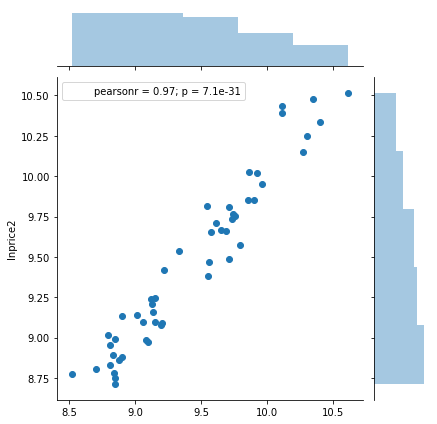

In [53]:
# We can see that RMSE value is quite low, which suggests that model is able to predict well. Lets see it graphically
sb.jointplot(x=y_pred, y=y_test)

In [90]:
# The graph is linear which shows that model is working well. Lets calculate RMSE as% of mean of lnprice.
print(autos_short.lnprice.describe())
print(0.136/9.374891*100)

count    204.000000
mean       9.374891
std        0.508476
min        8.540519
25%        8.959922
50%        9.303170
75%        9.731809
max       10.723267
Name: lnprice, dtype: float64
1.450683533280547


In [56]:
# The RMSE is only 1.45% of the mean value of lnprice, which indicates high accuracy of the model !!